# M508 Final Project
Michelle Vered & Jack Lawniczak<br>
April 2020

## Setup

In [1]:
# import needed packages
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import random
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn import svm

In [2]:
# global variables
classes = ['PNEUMONIA','NORMAL'] # given by the data
imageSize = 150  # based on typical image size in data, but a few images need to be resized

## Prepare Data

In [3]:
def getData(dataDirectory):
    '''find all image files, resize to standard size, 
    and save b/w pixel intensity in array '''
    
    # initialize empty lists to store data, images, classnames
    dataList = []
    imageList = []
    targetClassList = []
    fileList = []

    # loop through each class
    for eachClass in classes:
        
        # set file path and class number for each class
        path = os.path.join(dataDirectory,eachClass)
        classNumber = classes.index(eachClass)
        
        # loop through each image file in class
        for imageName in os.listdir(path):
            
            # save file extension
            extension = os.path.splitext(imageName)[1]
            
            try:
                if extension == '.jpeg':
                    # import image as grayscale set of pixel intensities
                    image = cv2.imread(os.path.join(path, imageName), cv2.IMREAD_GRAYSCALE)
                    
                    # resize all images to standard size
                    resizedImage = cv2.resize(image, (imageSize, imageSize))
                    
                    # save resized image to list
                    imageList.append(resizedImage)
        
                    # create a array of image data and save in list
                    reshapedData = np.reshape(resizedImage, (22500,))
                    dataList.append(reshapedData)
                    
                    # save class number to list
                    targetClassList.append(classNumber)
                    
                    # save file location to list
                    fileList.append(os.path.join(path,imageName))
                    
            # raise an exception if there's an issue importing/processing a picture
            except:
                print("Oops! Error importing & resizing image ", imageName)
    
    # combine all info together
    result = {}
    result['images'] = np.array(imageList)
    result['data'] = np.array(dataList)
    result['targetClasses'] = np.array(targetClassList)
    result['fileLocations'] = np.array(fileList)
    
    return result


In [4]:
# save file paths for each set of images
trainN = 'data/train/NORMAL'
trainP = 'data/train/PNEUMONIA'
testN = 'data/test/NORMAL'
testP = 'data/test/PNEUMONIA'
valN = 'data/val/NORMAL'
valP = 'data/val/PNEUMONIA'

In [5]:
# load in data
train = getData('data/train/')
test = getData('data/test')
validation = getData('data/val')

## Summary Statistics

In [6]:
# count of images
numTrainN = len(os.listdir(trainN))
numTrainP = len(os.listdir(trainP))
numTestN = len(os.listdir(testN))
numTestP = len(os.listdir(testP))
numValN = len(os.listdir(valN))
numValP = len(os.listdir(valP))

print('Total training normal lung images: ', numTrainN)
print('Total training pneumonia lung images: ', numTrainP)
print('Total test normal lung images: ', numTestN)
print('Total test pneumonia lung images: ', numTestP)
print('Total validation normal lung images: ', numValN)
print('Total validation pneumonia lung images: ', numValP)

Total training normal lung images:  1342
Total training pneumonia lung images:  3876
Total test normal lung images:  234
Total test pneumonia lung images:  390
Total validation normal lung images:  9
Total validation pneumonia lung images:  9


Text(0.5, 1.0, 'PNEUMONIA')

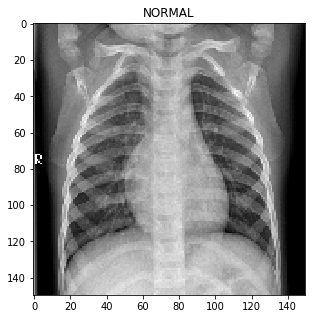

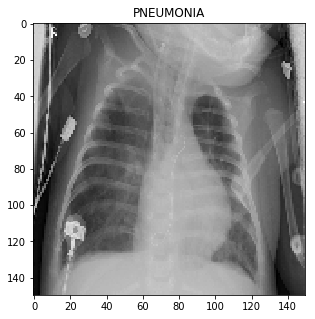

In [7]:
# preview images
plt.figure(figsize = (5,5))
plt.imshow(train['images'][-1], cmap='gray')
plt.title(classes[train['targetClasses'][-1]])

plt.figure(figsize = (5,5))
plt.imshow(train['images'][0], cmap='gray')
plt.title(classes[train['targetClasses'][0]])

## Fit PCA

### First two principal components

In [8]:
# fit PCA with only 2 components & show as scatter plot
projection_xy = PCA(2).fit_transform(train['data'])

In [9]:
# plot first two principal components

# plot in new window
%matplotlib qt

# set data for plot
x = projection_xy[:,0]
y = projection_xy[:,1]
i = train['images']
t = train['targetClasses']

# set 
fig, ax = plt.subplots(figsize=(100,100))
ax.scatter(x[train['targetClasses']==0],y[train['targetClasses']==0],c='red')
ax.scatter(x[train['targetClasses']==1],y[train['targetClasses']==1],c='blue')

# add title
fig.suptitle('First & Second Principal Components\nRed = Pneumonia, Blue = Normal', 
             fontsize='16',
             fontweight='heavy')

# subset of images to actually show on the plot
subset = random.sample(range(0,len(t)),100)

# define helper function for getting images
def getImage(imageData):
    return OffsetImage(imageData, cmap='gray', zoom=0.2)

# show images on the plot for that subset
count = 0
for x0, y0, i0, t0 in zip(x, y, i, t):
    if (t0 == 1 and (count in subset)):
        ab2 = AnnotationBbox(getImage(i0),
                             (x0, y0),
                             frameon = True,
                             bboxprops = dict(edgecolor='blue'))
        ax.add_artist(ab2)
    
    elif (t0 == 0 and (count in subset)):
        ab1 = AnnotationBbox(getImage(i0),
                            (x0, y0),
                            frameon = True,
                            bboxprops = dict(edgecolor='red')
                           )
        ax.add_artist(ab1)
    count +=1

### More principal components

In [10]:
pca10 = PCA(10).fit_transform(train['data'])

In [11]:
pca10Test = PCA(10).fit_transform(test['data'])

In [12]:
# plot principal components 3&4

# plot in new window
%matplotlib qt

# set data for plot
x = pca10[:,2]
y = pca10[:,3]
i = train['images']
t = train['targetClasses']

# set 
fig, ax = plt.subplots(figsize=(100,100))
ax.scatter(x[train['targetClasses']==0],y[train['targetClasses']==0],c='red')
ax.scatter(x[train['targetClasses']==1],y[train['targetClasses']==1],c='blue')

# add title
fig.suptitle('Third & Fourth Principal Components\nRed = Pneumonia, Blue = Normal', 
             fontsize='16',
             fontweight='heavy')

# subset of images to actually show on the plot
subset = random.sample(range(0,len(t)),100)

# define helper function for getting images
def getImage(imageData):
    return OffsetImage(imageData, cmap='gray', zoom=0.2)

# show images on the plot for that subset
count = 0
for x0, y0, i0, t0 in zip(x, y, i, t):
    if (t0 == 1 and (count in subset)):
        ab2 = AnnotationBbox(getImage(i0),
                             (x0, y0),
                             frameon = True,
                             bboxprops = dict(edgecolor='blue'))
        ax.add_artist(ab2)
    
    elif (t0 == 0 and (count in subset)):
        ab1 = AnnotationBbox(getImage(i0),
                            (x0, y0),
                            frameon = True,
                            bboxprops = dict(edgecolor='red')
                           )
        ax.add_artist(ab1)
    count +=1

In [13]:
# plot principal components 5&6

# plot in new window
%matplotlib qt

# set data for plot
x = pca10[:,4]
y = pca10[:,5]
i = train['images']
t = train['targetClasses']

# set 
fig, ax = plt.subplots(figsize=(100,100))
ax.scatter(x[train['targetClasses']==0],y[train['targetClasses']==0],c='red')
ax.scatter(x[train['targetClasses']==1],y[train['targetClasses']==1],c='blue')

# add title
fig.suptitle('Fifth & Sixth Principal Components\nRed = Pneumonia, Blue = Normal', 
             fontsize='16',
             fontweight='heavy')

# subset of images to actually show on the plot
subset = random.sample(range(0,len(t)),100)

# define helper function for getting images
def getImage(imageData):
    return OffsetImage(imageData, cmap='gray', zoom=0.2)

# show images on the plot for that subset
count = 0
for x0, y0, i0, t0 in zip(x, y, i, t):
    if (t0 == 1 and (count in subset)):
        ab2 = AnnotationBbox(getImage(i0),
                             (x0, y0),
                             frameon = True,
                             bboxprops = dict(edgecolor='blue'))
        ax.add_artist(ab2)
    
    elif (t0 == 0 and (count in subset)):
        ab1 = AnnotationBbox(getImage(i0),
                            (x0, y0),
                            frameon = True,
                            bboxprops = dict(edgecolor='red')
                           )
        ax.add_artist(ab1)
    count +=1

## SVM

In [14]:
# SVM regularization parameter
C = 1.0 

In [15]:
X = pca10[:,[2,3]]
y = train['targetClasses']

In [16]:
# fit SVM model
linearSVM = svm.SVC(kernel='linear', C=C)

In [17]:
# classifier
clf = linearSVM.fit(pca10[:,[2,3]],train['targetClasses'])

In [18]:
# test data
XTest = pca10Test[:,[2,3]]
yTest = test['targetClasses']

In [19]:
# predictions on test data
clfTest = clf.predict(XTest)

In [21]:
# accuracy

correct = 0
incorrect = 0
for i in range(0, len(clfTest)):
    if clfTest[i] == test['targetClasses'][i]:
        correct += 1
    else:
        incorrect += 1

In [25]:
print('Number of correct predictions on test set is: ', str(correct))

Number of correct predictions on test set is:  479


In [26]:
print('Number of incorrect predictions on test set is: ', str(incorrect))

Number of incorrect predictions on test set is:  145


In [31]:
accuracy = correct/(correct + incorrect) * 100
print('Accuracy is: ',str(round(accuracy,1)), '%')

Accuracy is:  76.8 %
